**Navigating the Future: A Quick Guide to Time Series Forecasting Theories**


Predicting the future is often shrouded in mysticism, but when it comes to data with a temporal order, we can utilize powerful statistical tools called time series forecasting theories. These theories help us make informed guesses about what might happen next in a sequence, whether it's stock prices, weather patterns, or sales figures. Let's delve into some key concepts:

**White Noise:** Imagine a rainstorm where drops fall randomly, with no discernible pattern. White noise mimics this randomness in data. It has no predictable trends or relationships between past and future values. White noise forecasting is challenging as it's like throwing darts at a blank wall—pure guesswork!

**ARMA & ARIMA:** These acronyms stand for Autoregressive Moving Average (ARMA) and Autoregressive Integrated Moving Average (ARIMA). They're like detectives, analyzing past values to predict future behavior. ARMA models combine the influence of past errors (moving average) with the impact of past observations (autoregression). ARIMA takes things a step further by "differencing" the data, making it stationary (more on that later). These models are workhorses for many forecasting tasks.

**Vector Autoregression (VAR):** Imagine multiple time series dancing in synchrony. VAR models capture these intricate relationships. They consider the lagged effect of one series on another, allowing you to forecast, say, electricity demand based on both temperature and economic activity.

**Seasonality:** Like clockwork, some data exhibits predictable ups and downs within a cycle, like monthly sales figures. Seasonality models incorporate these recurring patterns into the forecasting process, leading to more accurate predictions, especially for short-term horizons.

**Autoregression:** Remember how ARMA uses past observations? This is autoregression in action. It analyzes how much past values "regress" (influence) future values. For example, knowing yesterday's temperature might help predict tomorrow's.

**Partial Autoregression:** Sometimes, only a few past values hold significant predictive power for the future. Partial autoregression identifies these "lag terms" with the most impact, focusing the model on the truly relevant historical data.

**Stationarity:** Imagine a seesaw constantly tilting left or right. Such non-stationary data poses challenges for forecasting. ARIMA models, for example, require stationarity—where the data's mean and variance remain stable over time. Stationarity models like differencing help achieve this before forecasting.

These are just some of the many time series forecasting theories out there. Choosing the right one depends on the nature of your data, the forecasting horizon, and the complexities you need to capture. By understanding these concepts, you can navigate the often-murky waters of the future with greater confidence, leveraging the power of data to make informed decisions in a world that's constantly changing.

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

Import Data

In [ ]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\daily-min-temperatures.csv', index_col=0, parse_dates=True)
#index_col: make sure it not include indexingas another column
#parse_dates: It basically parses the dates in dat, months and years

X = df.values

print("Shape of data \t", df.shape)
print("Original dataset: \n", df.head())
print("After extracting only temprature: \n", X)

Shape of data 	 (3650, 1)
Original dataset: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
After extracting only temprature: 
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

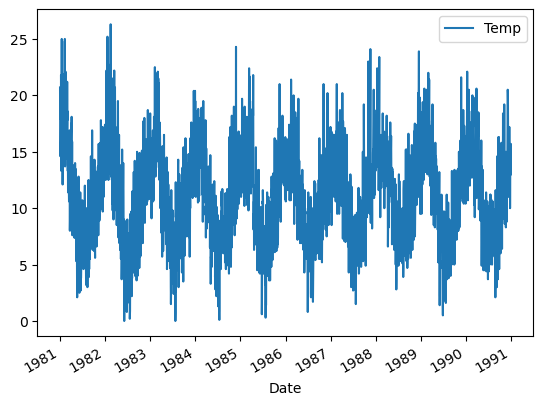

In [ ]:
df.plot()

#From the view it seams that it is not stationary, but you can check with small amount of data
#df[:200].plot()

Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['Temp'], autolag = 'AIC')

print("1. ADF : ", dftest[0])
print("2. P-Value: ", dftest[1])   # 0.5 > lower the P-Value, the better then it is stationary
print("3. Bumber of lags: ", dftest[2])
print("4. Number of observations used for ADF regrassion and critical values calculation :", dftest[3])
print("5. Critival values : ")
for key, val in dftest[4].items():
    print("\t",key,": ", val)

1. ADF :  -4.44480492461168
2. P-Value:  0.0002470826300361191
3. Bumber of lags:  20
4. Number of observations used for ADF regrassion and critical values calculation : 3629
5. Critival values : 
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


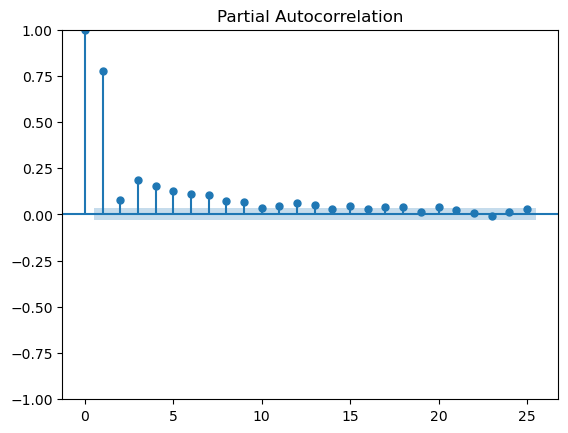

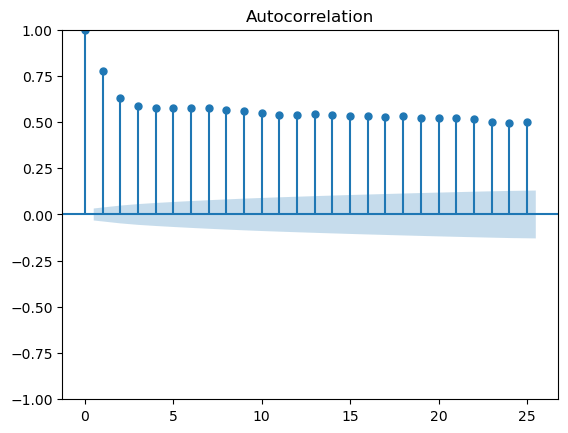

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf= plot_pacf(df['Temp'], lags=25)  #only measure direct effect of prticular time period with current time period
acf= plot_acf(df['Temp'], lags=25)    #measures lot of indirect effect thats why we will not going to consider it

#it gives indication how corelated different time period values are

Split Dataset intro Train and Test: Testing : Last 9 days

In [ ]:
train= X[:len(X)-9]
test= X[len(X)-9:]

In [ ]:
model= AutoReg(train, lags=10).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3641
Model:                    AutoReg(10)   Log Likelihood               -8370.626
Method:               Conditional MLE   S.D. of innovations              2.426
Date:                Sun, 14 Jan 2024   AIC                          16765.252
Time:                        15:48:00   BIC                          16839.619
Sample:                            10   HQIC                         16791.743
                                 3641                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9332      0.142      6.590      0.000       0.656       1.211
y.L1           0.6103      0.017     36.802      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
print(len(train))

3641


Make Predictions on Test Set and Compare

In [ ]:
pred= model.predict(start=len(train), end=len(X)-1, dynamic=False)

[13.42631028 13.56289284 13.69092641 13.66492415 13.70181677 13.63871264
 13.49606695 13.35412961 13.21926691]


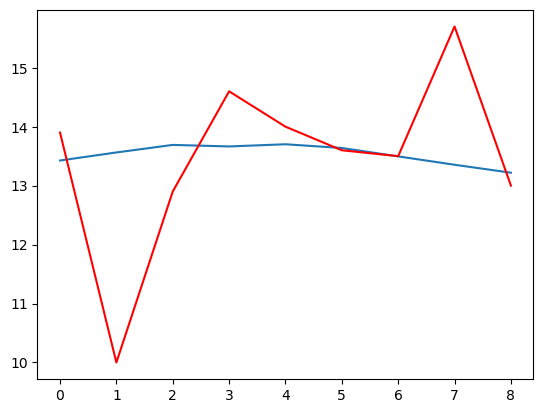

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pred)
plt.plot(test,color='red')
print(pred)

Calculate Errors

In [ ]:
from math import sqrt

from sklearn.metrics import mean_squared_error
rmse= sqrt(mean_squared_error(test, pred))

In [ ]:
print(rmse)

1.4929512909759424


Making Future Predictions

In [ ]:
pred_future= model.predict(start= len(X)+1, end= len(X)+9, dynamic= False)
print("future prediction for nest week")
print(pred_future)
print("Number of prediction made: \t", len(pred_future))

future prediction for nest week
[13.14149775 13.11853248 13.08294006 13.03594193 12.98402161 12.92727916
 12.87010763 12.8163406  12.76826976]
Number of prediction made: 	 9
